In [1]:
#--IMPORT BASIC LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# For timeseries RNN LSTM neural network
from tensorflow. keras.models import Sequential
from tensorflow. keras. layers import LSTM
from tensorflow. keras. layers import Dropout
from tensorflow. keras. layers import Dense

In [3]:
#-------- IMPORT KERAS: TimeseriesGenerator
# This class produces time series batches used on training/testing the model
from tensorflow.keras.preprocessing. sequence import TimeseriesGenerator
#---- IMPORT KERAS: MinMaxscaler
# This class is used to preprocess (scale) the data
from sklearn.preprocessing import MinMaxScaler

Data set

In [4]:
# Load the data
df_All = pd.read_csv('/content/energydata_complete.csv')

In [5]:
df_All.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Breif Expploratory Data Analysis

#(EDA)

In [6]:
df_All.shape

(19735, 29)

In [7]:
df_All.dtypes

,0
date,object
Appliances,int64
lights,int64
T1,float64
RH_1,float64
T2,float64
RH_2,float64
T3,float64
RH_3,float64
T4,float64


In [8]:
df_All.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
df = df_All.iloc[:, 4:5]

In [10]:
df.head()

,RH_1
0,47.596667
1,46.693333
2,46.300000
3,46.066667
4,46.333333


<Axes: >

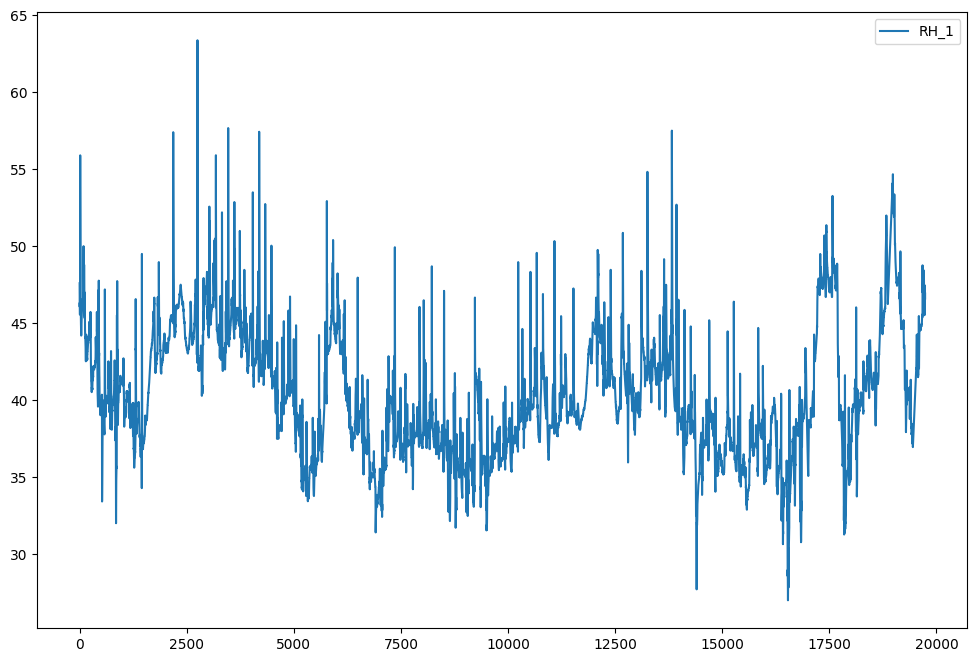

In [11]:
df.plot(figsize=(12,8))

#Length of Input Time Series - Number of Input Time Steps


In [13]:
length50 = 50

In [14]:
length50

50

#Time Series Dataset: Train / test Split

In [15]:
len(df)


19735

In [16]:
# Set percentage of data used for testing
test_percent = 0.1

#Split Data -> Train / Test


In [17]:
# Need to find the Length (number of data points) of the testing dataset
# It has been found (ahove) that around 205 data points are used for testing
test_length = np.round(len(df)*test_percent)

test_length

1974.0

In [18]:
# The testing data set starts at this index
# test start_ index = int(len(df) - test_Length)
split_index = int(len(df) - test_length)
split_index

17761

In [19]:
# Create separate trainging / testing datasets
# Training dataset: All the indices from start to split index
# (excluding split_index)
data_train = df.iloc[: split_index]
# Testing dataset:
# --) All the indices from (split_index - Length50) to the end of the dataframe
# --) split index - Length60: Need the Last 60 historical data points (belong to data_train) to predict the first data point of the data_test
data_test = df.iloc[split_index - length50 :]

In [20]:
data_train.head()

,RH_1
0,47.596667
1,46.693333
2,46.300000
3,46.066667
4,46.333333


In [21]:
len(data_train)

17761

In [22]:
data_train.tail(5)

,RH_1
17756,39.7
17757,39.7
17758,39.7
17759,39.7
17760,39.7


In [23]:
len(data_test)

2024

In [24]:
data_test.head(5)

,RH_1
17711,41.626667
17712,41.500000
17713,41.560000
17714,41.700000
17715,41.760000


In [25]:
data_test.tail(5)

,RH_1
19730,46.560000
19731,46.500000
19732,46.596667
19733,46.990000
19734,46.600000


#Normalize Data (Scale it into the range [0, 1])

In [26]:
# Create a MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler #Import MinMaxScaler
scaler = MinMaxScaler() # Correct the class name to MinMaxScaler

In [27]:
# IGNORE the warning: Just converting the data to floats
# ONLY scale the TRAINING dat - NOT scale testing data
# Train the scaler to perform the normalization
scaler. fit(data_train)

MinMaxScaler()

In [28]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)
# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

Create Timeseries Generator for Training

In [36]:
batch_size = 32
train_tsGenerator50 = TimeseriesGenerator (normalized_train, normalized_train, length=length50, batch_size=batch_size)

In [37]:
len(normalized_train)

17761

In [32]:
len(train_tsGenerator50)

17711

In [33]:
# What does the first batch look Like?
x,y = train_tsGenerator50[0]

In [34]:
print(x)

[[[0.56618659]
  [0.54132648]
  [0.53050179]
  [0.52408036]
  [0.53141914]
  [0.52297954]
  [0.51582424]
  [0.51013668]
  [0.5111687 ]
  [0.5247225 ]
  [0.51848454]
  [0.5331621 ]
  [0.57728649]
  [0.7073663 ]
  [0.79451426]
  [0.73947344]
  [0.7055316 ]
  [0.73305201]
  [0.66516833]
  [0.62682323]
  [0.589212  ]
  [0.56719567]
  [0.55150904]
  [0.53866618]
  [0.52389689]
  [0.51674158]
  [0.51949362]
  [0.51747546]
  [0.51371434]
  [0.50389872]
  [0.49821117]
  [0.49380791]
  [0.48830383]
  [0.48261627]
  [0.47711219]
  [0.47270893]
  [0.47270893]
  [0.47270893]
  [0.47270893]
  [0.47353454]
  [0.47720393]
  [0.47913035]
  [0.48261627]
  [0.48995505]
  [0.49380791]
  [0.49720209]
  [0.49720209]
  [0.50105495]
  [0.50497661]
  [0.50573342]]]


In [38]:
print(y)

[[0.5109623]]


#Build, Train, and Test Model


Build LSTM Model




In [39]:
# Set number of features
# Feature: Attribute/Variable of the data set - used as predictors
# Only using one feature: Close price
n_features = 1


In [40]:
# define model
model = Sequential ()

# Add an LSTM Layer
# This Layer has 40 LSTM cells
# Activation function: relu
# MUST: return
_sequences=True
# --) Because of multiple LSTM Layers: the Layers are stacked
# --) Outputs = inputs of the next LSTM Layer
model.add(LSTM(40, activation='relu', return_sequences=True, input_shape=(length50, n_features)))
# Dropout Layer
model.add(Dropout(0.2))
# Add 2nd LSTM Layer
# MUST: return_ sequences=True
# --) Because of multiple LSTM Layers: the Layers are stacked
# --) Outputs = inputs of the next LSTM Layer
model.add(LSTM(units=40, activation='relu', return_sequences=True))
# Dropout Layer
model. add (Dropout (0.2))
# Add 3rd LSTM Layer
model. add(LSTM(units=40, activation='relu'))
# Add a FC (fully-connected) Layer for the final prediction
model. add (Dense (1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model

In [41]:
# Compile the model
model. compile(optimizer= 'adam', loss= 'mse')
model. summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 40)              │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 40)              │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 40)                  │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,681 (127.66 KB)

 Trainable params: 32,681 (127.66 KB)

 Non-trainable params: 0 (0.00 B)

Train (Fit) Model Using fit_generator

In [44]:
# Train the model
# Train the model
model.fit(train_tsGenerator50, epochs=5)

Epoch 1/5
17711/17711 ━━━━━━━━━━━━━━━━━━━━ 904s 51ms/step - loss: 7.5320e-04
Epoch 2/5
17711/17711 ━━━━━━━━━━━━━━━━━━━━ 942s 52ms/step - loss: 5.6496e-04
Epoch 3/5
17711/17711 ━━━━━━━━━━━━━━━━━━━━ 921s 52ms/step - loss: 4.3644e-04
Epoch 4/5
17711/17711 ━━━━━━━━━━━━━━━━━━━━ 915s 52ms/step - loss: 3.7578e-04
Epoch 5/5
17711/17711 ━━━━━━━━━━━━━━━━━━━━ 943s 53ms/step - loss: 3.6403e-04


#Visualize Model's Performance after Training

In [50]:
# Access the training history
loss_history_keys = model.history.history.keys()
# model.history.history is a dict
# 'Loss': its key
# 'Loss': Loss during training;
loss_history_keys

dict_keys([])

Prediction for Testing: Using TimeseriesGenerator

#Create Timeseries Generator for Testing

In [46]:
# batch size MUST be 1
batch_size1 = 1
# Create a TimeSeriesGeneratoN for testing: test_ tsGenerator
test_stGenerator50 = TimeseriesGenerator(normalized_test, normalized_test, length=length50, batch_size=batch_size1)

#Predict Future Data Points for Testing

In [47]:
# Instead of using the deprecated `predict_generator`, use `predict` instead:
normalized_prediction = model.predict(test_stGenerator50)

1974/1974 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step


In [55]:
# Prediction is a numpy 2D array with only one column
normalized_prediction

array([[0.35554162],
       [0.3556153 ],
       [0.35421365],
       ...,
       [0.5118461 ],
       [0.51164323],
       [0.52160347]], dtype=float32)

In [56]:
len(normalized_prediction)

1974

In [57]:
# Convert normalized predictions back to the true values
prediction = scaler. inverse_transform (normalized_prediction)

In [58]:
# Assuming 'prediction' has shape (50, 1)
prediction_index = np.arange(17761, 19735, step=1)
# Adjust the prediction_index to match the length of 'prediction'
df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [59]:
df_prediction

,Prediction
17761,39.942528
17762,39.945206
17763,39.894279
17764,39.748123
17765,39.733585
...,...
19730,45.748810
19731,45.514019
19732,45.622116
19733,45.614746


#Visualize Prediction

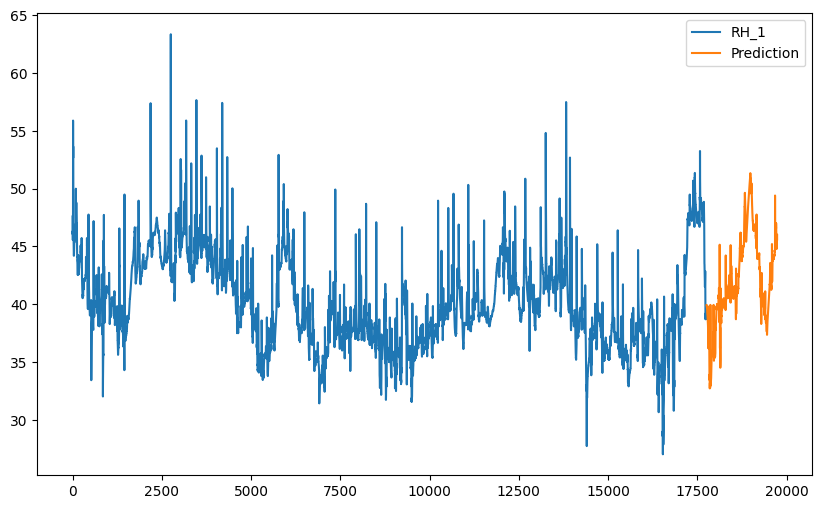

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_train' is your pandas DataFrame
ax = data_train.plot()  # Call the plot method on the DataFrame
df_prediction.plot(ax=ax, figsize=(10, 6))
plt.show()  # Display the plot

#Visualize Prediction and Compare Actual

<Axes: >

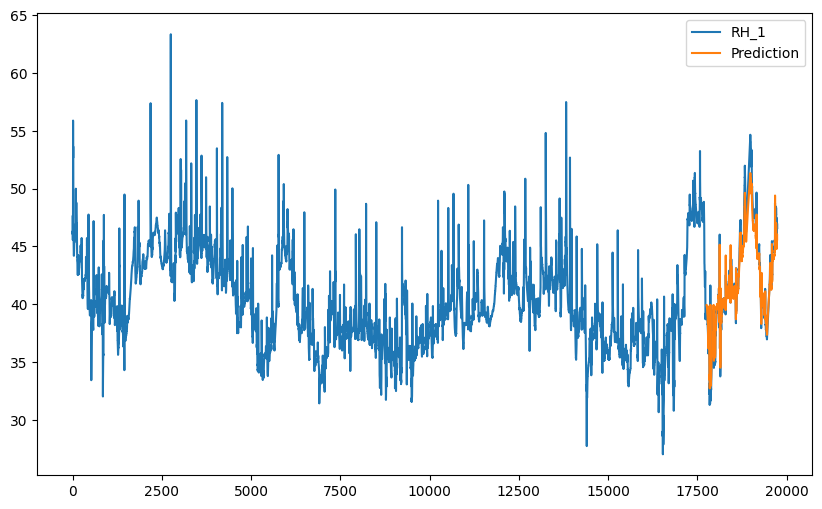

In [61]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(10, 6))

#Time Series Forecasting with LSTM
Overview
Time series forecasting:

-) Forecast into the "future" or unknown range

-) Should employ all the available data

-) I.e., NOT split the data into training/testing

In [62]:
#Still use MinHoxscaler to normalize the full input dataset df
full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

Create TimeSeriesGenerastor for Forecasting

In [63]:
# Number of time steps of the input time series
#Still use Length50:
length50

50

In [64]:
#Create Timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=50, batch_size=32)

Build, Compile, and Fit LSTM Model for Forecasting


In [65]:
# Train/Fit LSTH nodel
# In forecasting, we don't validate, only FORECAST
# So, not need Earlystop; Not need validation generator
# Use model.fit instead of model.fit_generator
# and call correct TimeseriesGenerator 'forecast_tsGenerator'
model.fit(forecast_tsGenerator, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


616/616 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - loss: 2.7331e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - loss: 2.3063e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 76s 76ms/step - loss: 2.3489e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - loss: 2.2382e-04
Epoch 5/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 89s 86ms/step - loss: 2.3055e-04


Time Series Forecast Using LSTM Neural Network:

In [66]:
forecast = []
# a Set periods with the time span of forecasting
# = Let's forecast for the next 107 business days
periods = 107

first_eval_batch = normalized_full_data[-length50:]
current_batch = first_eval_batch.reshape((1, length50, n_features))


for i in range(periods):
    # get prediction 1 time stamp ahead ((0) is for grabbing just the number instead of [array))
    current_pred = model.predict(current_batch)[0]
    # store prediction
    forecast.append(current_pred)
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

Inverse to Transform Normalized Data Back into True Values

In [67]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[45.39454901],
       [44.6744958 ],
       [43.95746393],
       [43.43396883],
       [42.91524507],
       [42.39122367],
       [41.88738135],
       [41.4092269 ],
       [40.97514718],
       [40.60486102],
       [40.31388121],
       [40.10114107],
       [39.94237244],
       [39.82222604],
       [39.72927277],
       [39.65644985],
       [39.59866539],
       [39.5507409 ],
       [39.50913523],
       [39.47327659],
       [39.44316825],
       [39.41890982],
       [39.40018944],
       [39.38639416],
       [39.37666848],
       [39.37001179],
       [39.36547545],
       [39.36228409],
       [39.35986269],
       [39.35786579],
       [39.35612554],
       [39.35459322],
       [39.35329047],
       [39.35225195],
       [39.35149499],
       [39.35100551],
       [39.35073695],
       [39.35062974],
       [39.35062216],
       [39.35065681],
       [39.35069363],
       [39.35070338],
       [39.35067306],
       [39.35063515],
       [39.3506135 ],
       [39

creating a new timespam index with pandas

In [68]:
df

,RH_1
0,47.596667
1,46.693333
2,46.300000
3,46.066667
4,46.333333
...,...
19730,46.560000
19731,46.500000
19732,46.596667
19733,46.990000


In [71]:
#Calculate forecast index
forecast_index = np.arange(107, 19735, step=1)

In [75]:
#Calculate forecast index
# Since the forecast data has 107 values, the index should also have 107 values.
# Assuming the starting index should be 17761, we can adjust the end index:
# forecast_index was originally np.arange(17761, 19735 + len(forecast), step=1)
# which creates an index much longer than the forecast data
forecast_index = np.arange(17761, 17761 + len(forecast), step=1)
# This creates an index with the same length as forecast

forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=["Forecast"])

In [76]:
forecast_df

,Forecast
17761,45.394549
17762,44.674496
17763,43.957464
17764,43.433969
17765,42.915245
...,...
17863,39.351107
17864,39.351107
17865,39.351107
17866,39.351107


#PLot the Forecast

<Axes: >

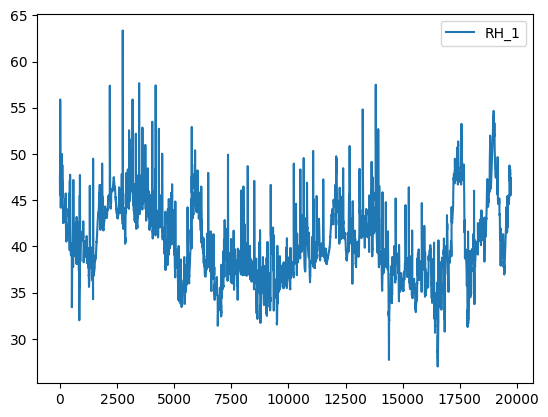

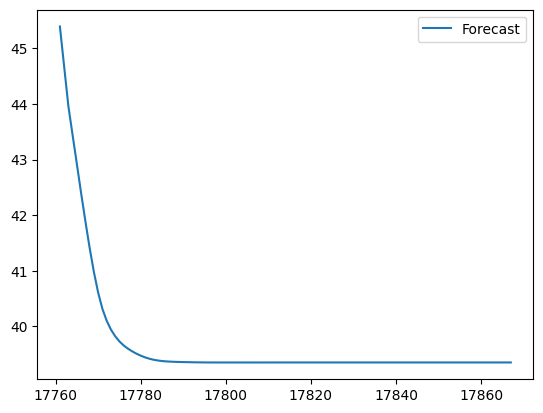

In [77]:
df.plot()
forecast_df. plot()

#Joining Pandas Plots

<Axes: >

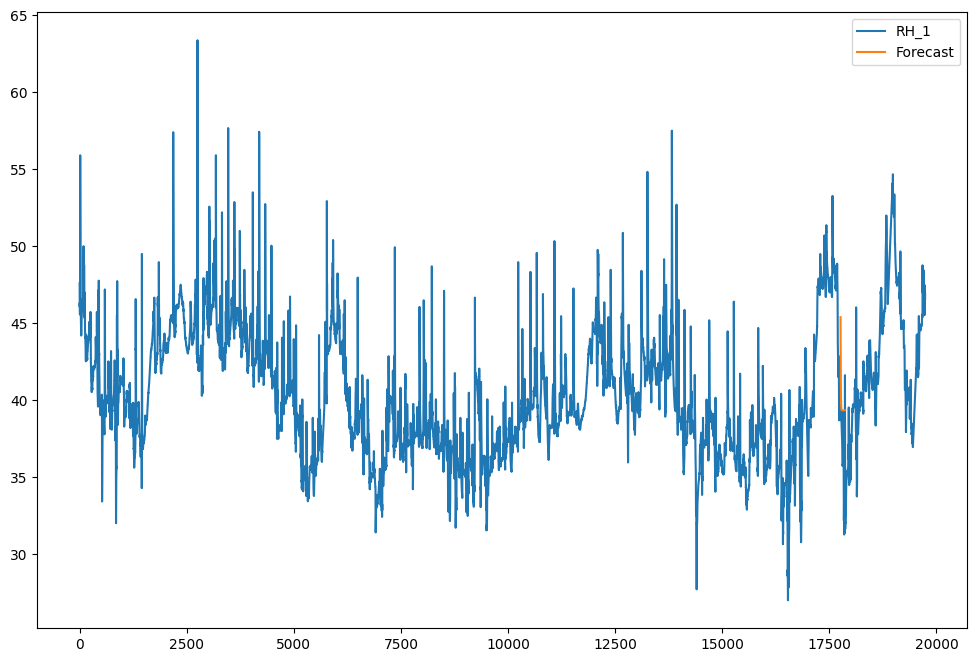

In [78]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))